# Analyzing the westbound traffic on the I-94

In this project we'll be looking at the dataset about the westbound traffic on the I94 Interstate highway. 

We are interested to determine factors that cause heavy traffic on I-94. 

In [2]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


A few observation:

- The dataset has 48204 rows and 9 columns
- It contains data from 2012-2018 for every hour. Each row represents one hour.
- Holiday, weather_main, weather_description are columns containing strings.
- date_time is classified as object but should be a timedate object.

### Let's learn more about the traffic volume

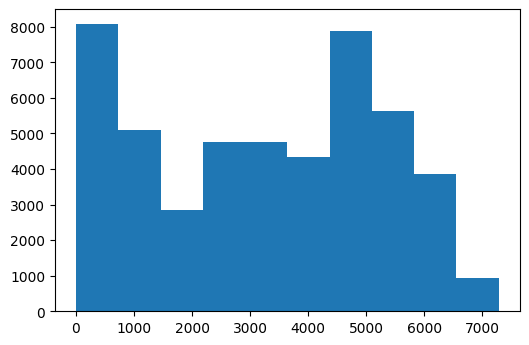

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic["traffic_volume"])
plt.show()

In [7]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Some observations about traffic volume:

- The most cars ever observed in an hour is 7280.
- The most frequent traffic is either quite low: upto 500 cars. Or it's quite high: between 4500 and 5000 cars. 
- On average, 3259 cars passed west on I-94.
- 25% of the time, the traffic was between 0 and 1193 cars. On the other hand, 25% of the time, traffic was 4933 cars or more. 
- The variation in traffic could be explained by daytime and nighttime variations.

#### Let's look closer into how traffic might be influenced by nighttime and daytime

In [8]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [9]:
traffic["hour"] = traffic["date_time"].dt.hour

Now let's separate the daytime and the nighttime data:

In [10]:
traffic["hour"].describe()

count    48204.000000
mean        11.398162
std          6.940238
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: hour, dtype: float64

In [11]:
daytime = traffic[(traffic["hour"] >= 7) & (traffic["hour"] <= 19)]

In [12]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25838 entries, 0 to 48199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              25838 non-null  object        
 1   temp                 25838 non-null  float64       
 2   rain_1h              25838 non-null  float64       
 3   snow_1h              25838 non-null  float64       
 4   clouds_all           25838 non-null  int64         
 5   weather_main         25838 non-null  object        
 6   weather_description  25838 non-null  object        
 7   date_time            25838 non-null  datetime64[ns]
 8   traffic_volume       25838 non-null  int64         
 9   hour                 25838 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.2+ MB


In [13]:
nighttime = traffic[(traffic["hour"] < 7) | (traffic["hour"] > 19)]

In [14]:
nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22366 entries, 11 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              22366 non-null  object        
 1   temp                 22366 non-null  float64       
 2   rain_1h              22366 non-null  float64       
 3   snow_1h              22366 non-null  float64       
 4   clouds_all           22366 non-null  int64         
 5   weather_main         22366 non-null  object        
 6   weather_description  22366 non-null  object        
 7   date_time            22366 non-null  datetime64[ns]
 8   traffic_volume       22366 non-null  int64         
 9   hour                 22366 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.9+ MB


### Let's compare the traffic during the day and night

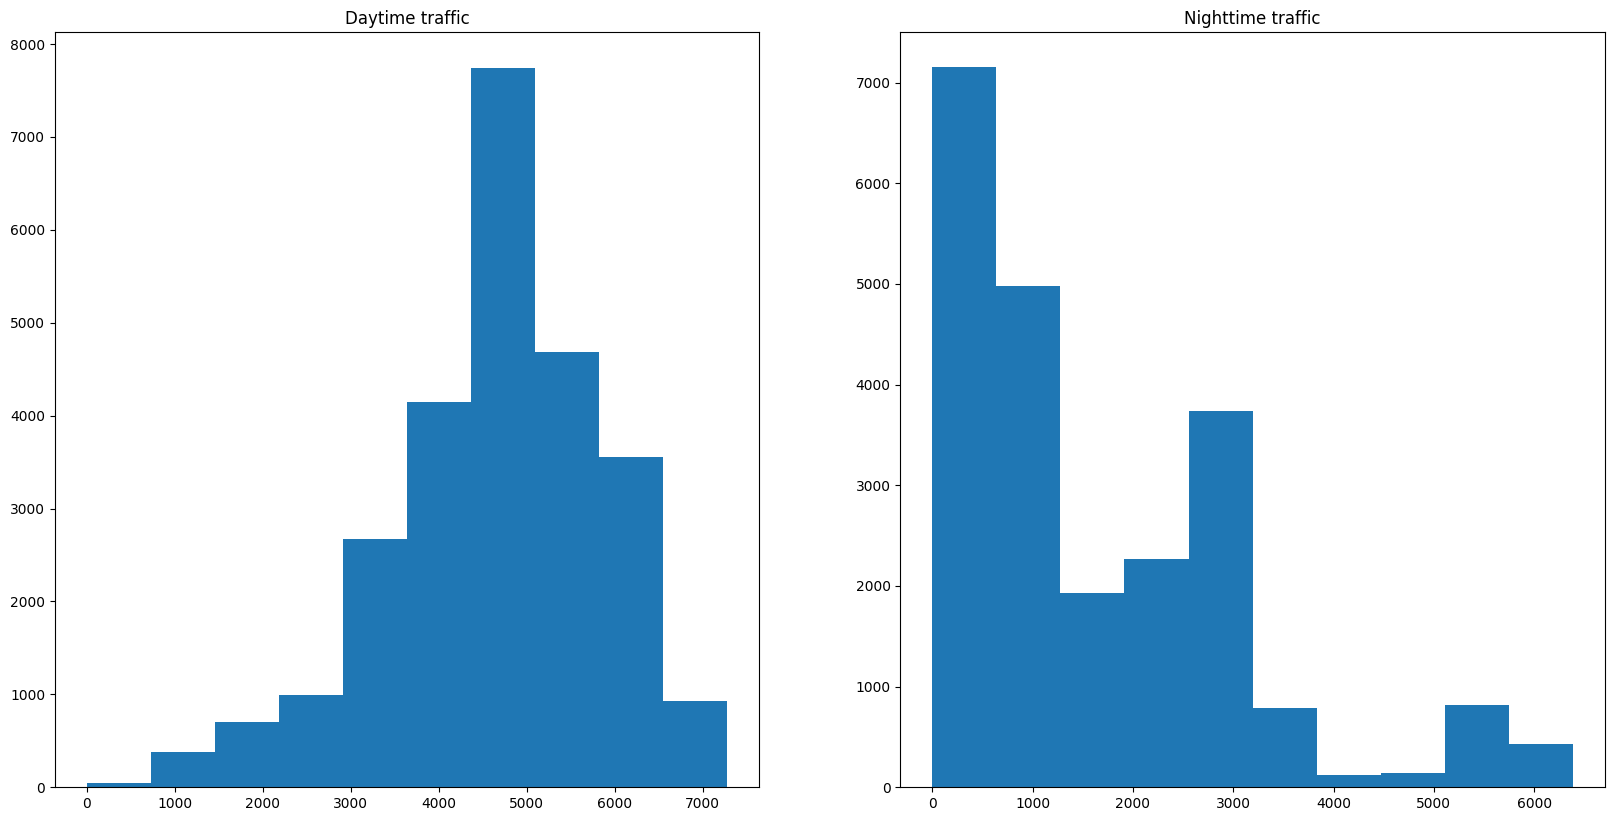

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(daytime["traffic_volume"])
plt.title("Daytime traffic")

plt.subplot(1,2,2)
plt.hist(nighttime["traffic_volume"])
plt.title("Nighttime traffic")

plt.ylim(0,7500)
plt.show()


In [16]:
daytime["traffic_volume"].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
nighttime["traffic_volume"].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

### Key observations:

Daytime traffic has a quite normal distribution, which means that the changes of there being little traffic and a lot of traffic are more equal. Nighttime traffic has a positive skewed distribution, which indicated that light traffic occurs more often than heavy traffic.

Average traffic during the night is 1425 cars/hours, and during the day it is 4649 cars/hour. 

The difference is further supported by the fact that in 25% of the times, night traffic is 486 cars/hour or less, while during the day that number is 4021 cars/hour. This is over 800% more traffic. 

Given these findings, we can exclude the nighttime data from our analysis since we are interested in uncovering the indicators of heavy traffic.

## The time aspect of traffic

One indicator of whether the traffic will be heavy or light is time. This encompases:

- Month
- Day of the week
- Time of day

All these factors might have say in how the traffic is. Let's look at whether traffic varies month to month.

<ipython-input-18-b01b7eba5ee2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



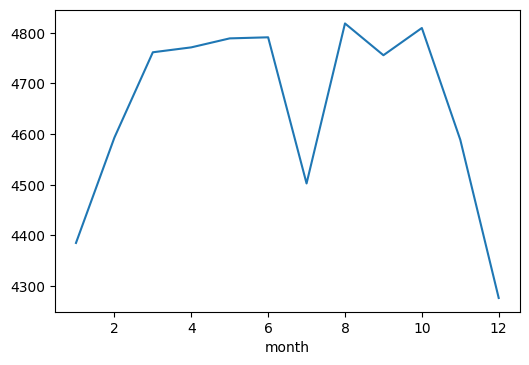

In [18]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

As we see, January and December tend to have the least traffic. July tends to have less traffic as well. A lot of holidays and common vacation times tend to fall to those months. The fact that people travel less than could explain the lighter traffic.

That being said, the average traffic doesn't differ a lot between months. 

The month with the most average traffic is October with 4921 cars/hour. The month with the least traffic is December with 4374 cars/ hours. That is a difference of 547 cars/ hour, so the difference isn't big.

#### Let's now look how the average traffic varies depending on the day of the week

<ipython-input-19-3594305bb2cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



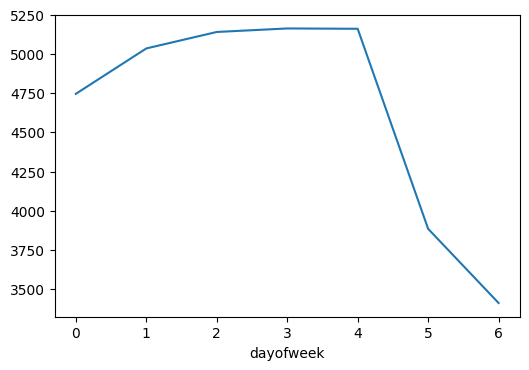

In [19]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

As expected, the traffic does down during the weekend.

#### Let's now look how traffic changes depending on the hour of the day

In [20]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-20-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



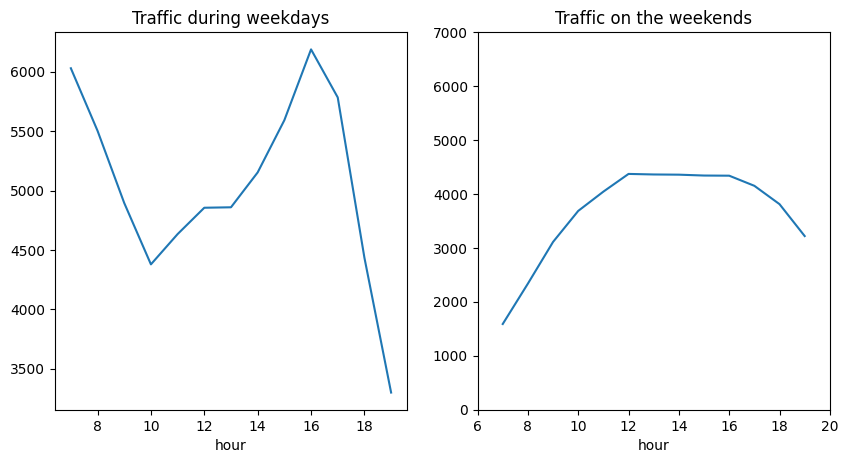

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic during weekdays")

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic on the weekends")

plt.ylim([0,7000])
plt.xlim([6,20])
plt.show()

During the weekdays, 7am and 4pm are definite rush hours. We see that the traffic dies down after 7am and builds up again during 4pm. After 4pm the traffic declines. This when people do and come back from work.

When it comes to the weekends, we see that people get on the road much later. The peak traffic is about noon, and it's significantly ligther than the weekday traffic. The average traffic is also much more stable over the course of the weekend days. This is probably because people keep different schedules during the weekend so there are people out and about at all times of the day.

## Weather and traffic

Another possible influence on traffic is the weather. We've got quite a few weather realted data in our dataset. Let's see how they correlate with the traffic volume.

In [22]:
daytime[["temp", "rain_1h", "snow_1h", 
         "clouds_all"]].corrwith(daytime["traffic_volume"])

temp          0.118084
rain_1h       0.004020
snow_1h       0.003768
clouds_all   -0.033410
dtype: float64

Temprature seems to be the factor that correlates the most with traffic volume, but it's a pretty weak correlation.

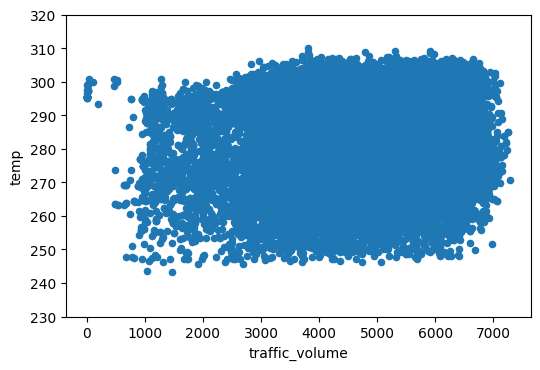

In [23]:
daytime.plot.scatter(x='traffic_volume',
                     y='temp')
plt.ylim(230, 320)
plt.show()

Judging by the scatter plot, people seem to be driving regardless of how cold or hot it is. Tempreture is therefore not a significant indicator of heavy traffic.

#### Let's look at other weather factors and how they effect traffic

In [24]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

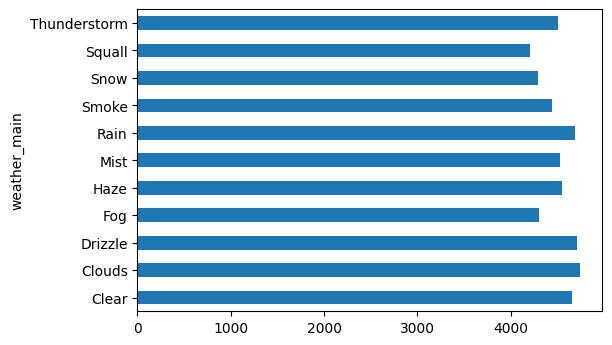

In [25]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

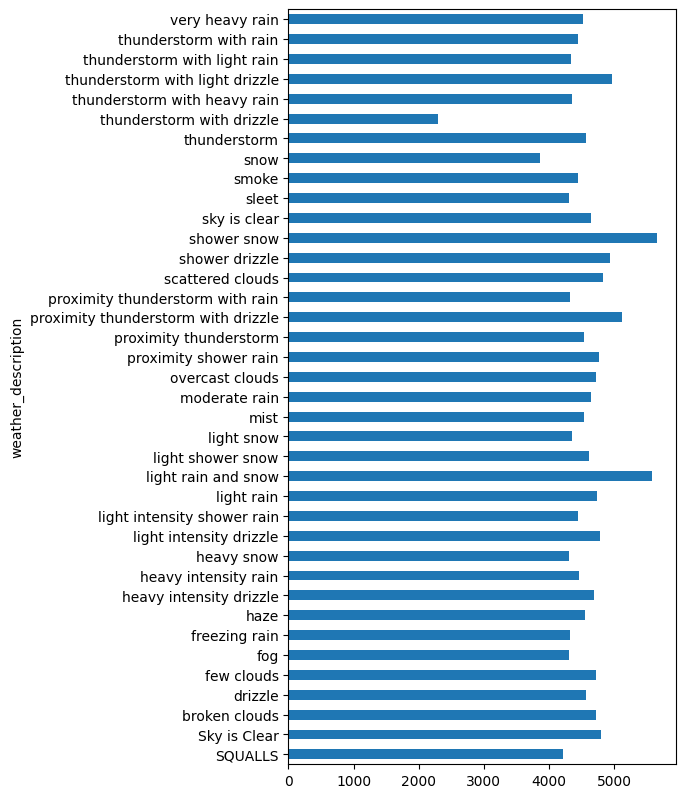

In [29]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

These types of weather cause the hourly traffic to exceed 5000 cars:

- light rain and snow
- promixity thunderstorm with drizzle
- shower snow

## Conclusion

We found two tipes of heavy traffic indicators: time and weather.

Time indicators:

- Warm months (March to October) have heavier traffic compared to colder months (November to February).
- Traffic is heavier on weekdays compared to weekends.
- There is typically a rush hour between 7:00 and 16:00 on weekdays.

Weather indicators:

- Snow tends to cause heavier traffic, regardless of how heavvy the snowfall is
- Rain causes problems too, but only during thunderstorms.